# METHODOLOGY-OSEMN

a. Obtain -Types of Data collected, Sources, Reliability 

b. Scrub -Processes done to clean the dataset, types of imputation used etc. 

c. Explore -Exploratory Data Analysis to investigate the data in terms of anomalies, and to check assumptions using statistics and graphical representations. 

 
**OSEMN Framework:**


>Obtain – Data Collection 

To obtain the data from available data sources. It is very important to collect complete and reliable data.

>Scrub – Data Cleaning 

Fixing or removing incorrect, corrupted, inonsistent, duplicate, or incomplete data within a dataset. 

>Explore – Data Analysis 

Understand the data to figure out the course of actions and areas that can be explored in the modeling phase.

# Obtain – Data Collection

* a. Obtain -Types of Data collected, Sources, Reliability 

Link to Dataset used:
https://www.kaggle.com/datasets/ealaxi/paysim1?datasetId=1069&language=Python

## Data Overview
This part of the data summary is mainly to have a general understanding of the data set, to do a first acquaintance with the data, including a brief understanding of the data (head, tail), row information (shape), statistical characteristics of the data (describe), information about the data (info), etc.

1. load various data science and visualization libraries:
    - Data science libraries pandas, numpy, scipy.
    - visualization libraries matplotlib, seaborn.
    - others.
2. loading data.
    - Loading entire datasets.
    - Abridged observation of the data (head()+shape).
3. overview of the data:
    - Familiarize with the statistics associated with the data using describe()
    - Familiarize with the data types using info()

### Import data science and visualization libraries

In [ ]:
#coding:utf-8
#Import the warnings package and use filters to implement ignore warning statements.
# import warnings
# warnings.filterwarnings('ignore')

#The magic method in IPython notebook to get the image directly 
#after each run and no longer need to use plt.show()
%matplotlib inline  

import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(palette="pastel")

import missingno as msno # Visualization of missing values

pylab.rcParams[ 'figure.figsize' ] = 16,9

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from xgboost import XGBClassifier, plot_importance

### Load Dataset

In [ ]:
ori_data=pd.read_csv('./Fraud_ori.csv')

###### Dataset info

In [ ]:
ori_data.info()

###### View dataframe sample

In [ ]:
ori_data.sample(5)

###### Dataset size

In [ ]:
ori_data.shape

###### View column names

In [ ]:
ori_data.columns

All the column names with descriptions are shown below.

* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

# Scrub – Data Cleaning

* b. Scrub -Processes done to clean the dataset, types of imputation used etc. 

###### Identify columns with missing values

In [ ]:
ori_data.isnull().any()

No missing values are found.

###### Identify duplicated rows

In [ ]:
ori_data.duplicated().sum()

All rows are unique.

###### Count number of Fraud and Non-Fraud transactions

In [ ]:
# custom_autopct function
def custom_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.4f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [ ]:
isFraudCount = ori_data['isFraud'].value_counts()
isFraudCount

In [ ]:
plt.figure(figsize=(15,15))
isFraudCount = ori_data['isFraud'].value_counts()
plt.subplot(1,2,1)
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#FFDBDB','#FF0000'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

isFlaggedFraudCount = ori_data['isFlaggedFraud'].value_counts()
plt.subplot(1,2,2)
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#FFF0AE','#F7FF00'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#FFDBDB','#FF0000'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

###### Count number of isFlaggedFraud and NotFlaggedFraud transactions

In [ ]:
isFlaggedFraudCount = ori_data['isFlaggedFraud'].value_counts()
isFlaggedFraudCount

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#FFF0AE','#F7FF00'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

The analysis above shows that the data are very imblanced.

The number of fraud transactions composes 99.8% of the total transactions recorded, meanwhile non-fraud transactions contributes less than 1%.

It is even worse for isFlaggedFraud transactions.

This will be explored further in the modelling phase.

https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

# Explore – Data Analysis

* c. Explore -Exploratory Data Analysis to investigate the data in terms of anomalies, and to check assumptions using statistics and graphical representations.

### Descriptive Statistical Summary of the data
The descriptive statistics allow us to get a general idea of the data within each feature. The statistical attributes are:
- count: the number of counts
- mean: average
- std: standard deviation
- min: minimum value
- 25%: upper quartile
- 50%: median
- 75%: lower quartile
- max: maximum value

In [ ]:
ori_data['isFraud'].unique()

In [ ]:
ori_data['isFlaggedFraud'].unique()

In [ ]:
ori_data.describe()

It can be seen that `isFraud` and `isFlaggedFraud` are a dichotomous variables.

These are continuous variables:
`oldbalanceOrg `
`newbalanceOrig `
`oldbalanceDest`
`newbalanceDest`

### Type of transactions

In [ ]:
plt.figure(figsize=(8,8))
ori_data.groupby('type').size().plot(kind='pie',autopct=custom_autopct(ori_data['type'].value_counts()))
plt.legend(loc='upper left')

### Count of Fraud and Non-Fraud Transactions in each type of Transaction

In [ ]:
plt.figure(figsize=(10,8))
ax = ori_data.groupby(['type','isFraud']).size().plot(kind='bar', color='#0080FF')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Data above shows that only CASH_OUT and TRANSFER have fraud transactions.

We can infer that only these two types of transactions will have fraud activity.

It is likely that fraud happens by fund TRANSFER to one account, then being CASH_OUT from that account.

Thus we can remove observations of other types.

In [ ]:
data = ori_data.drop(ori_data[(ori_data.type == 'PAYMENT') | (ori_data.type == 'DEBIT') | (ori_data.type == 'CASH_IN')].index)

In [ ]:
data.info()

In [ ]:
plt.figure(figsize=(15,15))
isFraudCount = data['isFraud'].value_counts()
plt.subplot(1,2,1)
plt.pie(isFraudCount, labels=['non-fraud','fraud'], colors=['#CCFFFF','#006ABC'], autopct=custom_autopct(isFraudCount))
plt.legend(loc='upper left')

isFlaggedFraudCount = data['isFlaggedFraud'].value_counts()
plt.subplot(1,2,2)
plt.pie(isFlaggedFraudCount, labels=['not flagged fraud','flagged fraud'], colors=['#E2AEFF','#741FA5'], autopct=custom_autopct(isFlaggedFraudCount))
plt.legend(loc='upper left')

### Continuous feature analysis

The following is an analysis of the continuous variables feature.

In [ ]:
# Select data from the list of columns defined
cont = data[['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
cont_num = list()
for x in cont:
    v = len(data[x].value_counts())
    cont_num.append([v, x])
cont_num.sort()
for x in cont_num:
    print(x[1] + "'s kinds of value:", x[0])

In [ ]:
con_cont=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
#Continuous Variable Analysis
k = 0
plt.figure(figsize=(20,20)) 
for x in con_cont:
    k = k+1
    plt.subplot(2,2,k)
    plt.title(x, size=16)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel('counts')
    sns.kdeplot(data[x].dropna(),shade=True)

As can be seen from the chart: 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', all four continuous type variables belong to the right skewed distribution of the skewed distribution.

Graphically it can be understood that the skew is off to the right. So in order to achieve a sum of the differences between the data and the mean of 0, there are larger numbers to balance with, so there is a long trailing right-hand side of the distribution. The median reflects the center of the data in terms of position, so 1/2 of the data position will be to the left of the mean, while the plurality reflects the center of the data in terms of quantity and will also be to the left of the mean.

In the right skewed distribution (positive skew): mode < median < mean

### Correlation analysis

In [ ]:
#Remove the useless features
data_select=data.copy()
data_select.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
#Re-indexing 
data_select.reset_index()
#Convert type to category data, which is--- 0, 1
# data_select.loc[data_select.type=='TRANSFER','type'] = 0
# data_select.loc[data_select.type=='CASH_OUT','type'] = 1

In [ ]:
data_select

In [ ]:
plt.figure(figsize = (6,5), dpi = 150)

sns.heatmap(data_select.corr(), cmap="Blues")

From the correlation heatmap above, it is seen that the following variables are having strong correlation:

oldbalanceOrg & newbalanceOrig
oldbalanceDest & newbalanceDest

Therefore we can drop two of one of the columns from each pair.

In [ ]:
# # Correlation graph
# # Show the relationship between variables two by two, linear, non-linear, correlation
# data_num = data[['oldbalanceOrg','newbalanceOrig']]
# sns.pairplot(data_num,kind='reg',diag_kind='kde') 

In [ ]:
# # Correlation graph
# # Show the relationship between variables two by two, linear, non-linear, correlation
# data_num = data[['oldbalanceDest','newbalanceDest']]
# sns.pairplot(data_num,kind='reg',diag_kind='kde') 

### Fraudulent transaction methods

In [ ]:
data.loc[data['isFlaggedFraud']==1].type.value_counts()

In [ ]:
isFlaggedFraudDf = data.loc[data['isFlaggedFraud']==1]
isFlaggedFraudDf['type'].unique()

Only 16 frauds are flagged by the banking system and all are in the form of transfers, and the flagged frauds are necessarily frauds Considering that frauds tend to have a lower limit on the amount of money that can be earned from small frauds, the impact of the transaction amount is explored. At the same time, considering the fact that fraud will generally take all the deposits in the account, fraud favors the transfer account with large deposits, the transfer account is a criminal withdrawal account, so the balance before the transfer account should be very low or even 0. Based on the above considerations, the following inquiry is conducted.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10),dpi=150)
sns.boxplot(x='isFraud',y='amount',hue='type',data=data,ax=axs[0][0])
axs[0][0].set_yscale('log') 
sns.scatterplot(x='oldbalanceOrg', y='amount', data=data[data['isFraud'] ==1], ax=axs[0][1])
sns.boxplot(x='isFraud',y='oldbalanceOrg',hue='type',data=data,ax=axs[1][0])
axs[1][0].set(ylim=(0, 5e7)) 
sns.boxplot(x='isFraud',y='oldbalanceDest',hue='type',data=data,ax=axs[1][1])
axs[1][1].set(ylim=(0, 3e7)) 

In the two figures in the first row, the results find that there is indeed a concentration of fraudulent amounts, but given that there is also a concentration and similar amounts in non-fraudulent transfers, the AMOUNT field is not significantly representative. It is interesting to find that when the balance of the transferred account is below 1e7, the balance is completely fraudulent. However, as the balance increases, the fraudulent amount stays at 1e7, which is unexplained.

In the two charts in the second row, the fraud is concentrated in accounts with low balances in the transferred accounts, which is different from what would be expected. The balance before the transfer to the account is generally very low at the time of the fraud, which compounds the consideration that fraudsters avoid seizing accounts and try to choose vacant accounts.

In [ ]:
plt.figure(figsize = (8,6), dpi = 150)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=data[data['isFraud'] ==0])

Transactions exist for amounts exceeding 10 million, but the fraudulent amount does not exceed 10 million.

In [ ]:
count_fraud_10m = len(data[(data['isFraud']==0) & (data['amount'] > 10000000)].index)

In [ ]:
count_non_fraud_10m = len(data[(data['isFraud']==1) & (data['amount'] > 10000000)].index)

In [ ]:
count_fraud_series = pd.Series(np.array([count_fraud_10m, count_non_fraud_10m]))
ax = count_fraud_series.plot.pie(y='count', labels=['non-fraud', 'fraud'], autopct=custom_autopct(count_fraud_series), figsize=(8, 8))
ax.legend(['non-fraud > 10m','fraud > 10m'])

There are 2443 transactions with transaction amount over 10 million and all of them are not fraudulent.

**Account types in the dataset beginning with M are Merchant accounts, and those beginning with C are Customer accounts**

In [ ]:
data_Fraud =data.loc[data.isFraud == 1]
data_NotFraud = data.loc[data.isFraud == 0]
print("Customer transferer (fraud):",len(data_Fraud.loc[data_Fraud.nameOrig.str.contains('C')]))
print("Merchant transferer (fraud):",len(data_Fraud.loc[data_Fraud.nameOrig.str.contains('M')]))
print("Customer receiver (fraud):",len(data_Fraud.loc[data_Fraud.nameDest.str.contains('C')]))
print("Merchant receiver (fraud):",len(data_Fraud.loc[data_Fraud.nameDest.str.contains('M')]))
print("Customer transferer (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameOrig.str.contains('C')]))
print("Merchant transferer (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameOrig.str.contains('M')]))
print("Customer receiver (non-fraud):",len(data_NotFraud.loc[data_NotFraud.nameDest.str.contains('C')]))
print("Merchant receiver (not fraudulent):",len(data_NotFraud.loc[data_NotFraud.nameDest.str.contains('M')]))

In [ ]:
N = 4
fraud_num = [8213, 0, 8213, 0]
non_fraud_num = [2762196,0,2762196,0]
ind = np.arange(N)  # the x locations for the groups
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fraud_num, width, color='g')
rects2 = ax.bar(ind + width, non_fraud_num, width, color='b')

ax.set_ylabel('Counts')
ax.set_title('Counts of Fraud and Non-Fraud Transactions by Account Type')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C-transferer', 'M-transferer', 'C-receiver', 'M-receiver'))

ax.legend((rects1[0], rects2[0]), ('Fraud', 'Non-Fraud'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [ ]:
data_Fraud.loc[data_Fraud.nameDest.isin(data_Fraud.loc[(data_Fraud.type=='CASH_OUT')].nameOrig)]

Usually after a scam, the recipient account should transfer the money out, so check if there is a duplicate recipient and withdrawer in the scam. But the result proves that no such account exists and the logic of transferring money first and withdrawing it later represented by STEP does not reflect it

###### Check the occurence of each nameDest in TRANSFER isFraud

In [ ]:
data[(data['isFraud']==1) & (data['type']=='TRANSFER')]['nameDest'].value_counts()

###### Check the occurence of each nameOrig in CASH_OUT isFraud

In [ ]:
data[(data['isFraud']==1) & (data['type']=='CASH_OUT')]['nameOrig'].value_counts()

In [79]:
fraud = data[data["isFraud"] == 1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0


In [80]:
valid = data[data["isFraud"] == 0]
valid

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.00,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.00,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.00,C932583850,6267.00,2719172.89,0,0
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.00,C1509514333,288800.00,2415.16,0,0
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.00,C824009085,70253.00,64106.18,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.00,C248609774,652637.00,6453430.91,0,0
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.00,C2001112025,25742.00,0.00,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.20,C1937962514,517.00,8383.29,0,0
60,1,CASH_OUT,82940.31,C1528834618,3017.87,0.00,C476800120,132372.00,49864.36,0,0
70,1,CASH_OUT,47458.86,C527211736,209534.84,162075.98,C2096057945,52120.00,0.00,0,0


### Checking Fraudulent Transactions by Hour

In [122]:
groupby_step = fraud.groupby('step').size()

In [121]:
groupby_step.sum()

8213

Text(0, 0.5, 'Number of transactions')

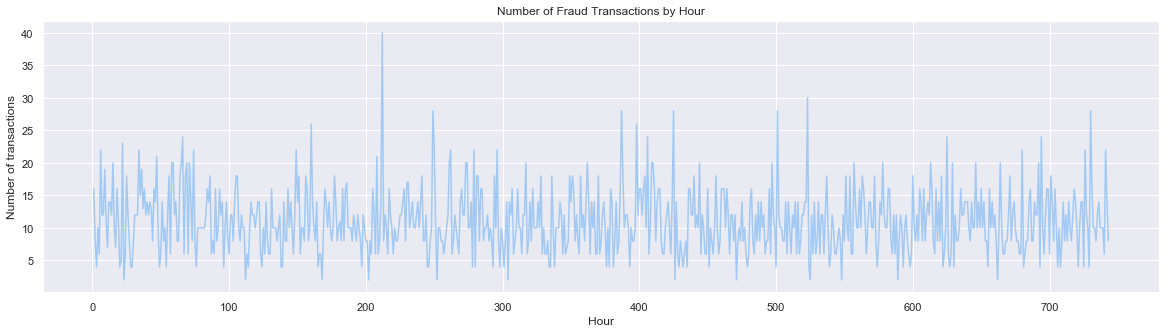

In [92]:
plt.figure(figsize=(20,5))
plt.plot(groupby_step)

plt.title('Number of Fraud Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of transactions')

It is seen that there are at least 2 fraudulent transactions happening every hour and has its peak at the 212th hour (equivalent to the 8th Day 20 Hour), with 40 transactions recorded.

However, the fluctuation shows that there is inconsistency in fraudulent transaction occurence.

Therefore, 'step' could be negligible.